In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.checkpoint.memory import MemorySaver

In [2]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
llm = ChatGoogleGenerativeAI(model= 'gemini-2.5-flash')

def chat_node(state: ChatState):

    messages = state['messages']

    response = llm.invoke(messages)

    return {'messages': [response]}

In [11]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)


chatbot = graph.compile(checkpointer= checkpointer)

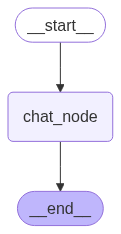

In [5]:
chatbot

In [6]:
initial_state = {
    'messages': [HumanMessage(content='What is the captail of india')]
}

chatbot.invoke(initial_state)

{'messages': [HumanMessage(content='What is the captail of india', additional_kwargs={}, response_metadata={}, id='de728ea8-743f-456e-b6f5-39121789b0b4'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--f567720a-c0ec-41f8-84ff-45310fa8d527-0', usage_metadata={'input_tokens': 8, 'output_tokens': 35, 'total_tokens': 43, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 26}})]}

In [13]:
thread_id = '1'

while True:

    user_message = input('Type Here')
    print('User', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {'configurable': {'thread_id': thread_id}}

    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config = config)

    print('AI:', response['messages'][-1].content)

User Hi my name is shreyash
AI: Hello Shreyash! It's good to meet you again.

How can I assist you today?
User tell me my name
AI: Your name is Shreyash.
User now add 10 and 20
AI: 10 + 20 = 30
User multiply result with 3 
AI: The previous result was 30.

30 * 3 = 90
User by
AI: Goodbye, Shreyash!

If you have any more questions or need help with anything else, feel free to ask. Have a great day!
User 


/home/shreyash-ubuntu/Genai and Agenticai/myenv/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:1803: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
Gemini produced an empty response. Continuing with empty message
Feedback: 


AI: 
User 


/home/shreyash-ubuntu/Genai and Agenticai/myenv/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:1803: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(


AI: Goodbye, Shreyash!

It was nice chatting with you. Feel free to come back anytime if you need anything else. Have a great day!
User exit


In [14]:
chatbot.get_state(config= config)

StateSnapshot(values={'messages': [HumanMessage(content='i am shreyash', additional_kwargs={}, response_metadata={}, id='9f0af64f-3782-4cfd-95bc-e1ca3b8f33d8'), AIMessage(content="Hello Shreyash! It's good to meet you.\n\nHow can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--80d9b158-6e90-49c5-98e8-82f887b5091f-0', usage_metadata={'input_tokens': 6, 'output_tokens': 458, 'total_tokens': 464, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 437}}), HumanMessage(content='tell me my name', additional_kwargs={}, response_metadata={}, id='5dc9ed3a-e199-434f-a254-a50bde601ec2'), AIMessage(content='Your name is Shreyash.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings